<a href="https://colab.research.google.com/github/sandyzden/DLAssignment/blob/main/DLAssignmentProblem2Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import io
import pandas as pd


In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Part - 1
1) Importing the Required Libraries 

2) Importing the dataset

3) Check if the GPU is enabled


In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import gensim
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
import re
import logging
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.models import Sequential
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [8]:
id = '1eULXfjvCrAms_RipkSnXmvZl5Td2j3vn'

In [9]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training.1600000.processed.noemoticon.csv')  


In [10]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]

In [11]:
df3 = pd.read_csv('training.1600000.processed.noemoticon.csv', sep=',', engine='python', names=DATASET_COLUMNS)

In [12]:
df3.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [14]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Part - 2
1) Print at least 2 tweets from each class


In [15]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}

In [16]:
def decode_sentiment(label):
    return decode_map[int(label)]

In [17]:
%%time
df3.target = df3.target.apply(lambda x: decode_sentiment(x))

CPU times: user 576 ms, sys: 3.67 ms, total: 580 ms
Wall time: 586 ms


In [18]:
df3[df3['target'] == 'POSITIVE'].head(5)

,target,ids,date,flag,user,text
800000,POSITIVE,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,POSITIVE,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,POSITIVE,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,POSITIVE,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,POSITIVE,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [19]:
df3[df3['target'] == 'NEGATIVE'].head(5)

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Dataset labels distribuition')

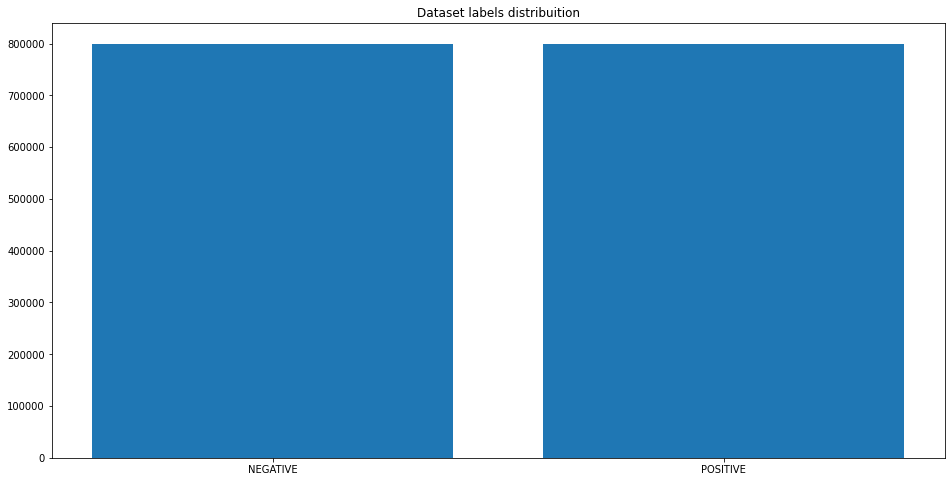

In [20]:
target_cnt = Counter(df3.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [21]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10


In [22]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [23]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)


In [24]:
%%time
df3.text = df3.text.apply(lambda x: preprocess(x))

CPU times: user 43.8 s, sys: 136 ms, total: 43.9 s
Wall time: 43.9 s


In [25]:
df3.text

0               awww bummer shoulda got david carr third day
1          upset update facebook texting might cry result...
2          dived many times ball managed save 50 rest go ...
3                           whole body feels itchy like fire
4                                           behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

In [26]:
df_train, df_test = train_test_split(df3, test_size=0.2, random_state=42)

In [27]:
df_train.shape

(1280000, 6)

In [28]:
df_test.shape

(320000, 6)

In [29]:
%%time
documents = [_text.split() for _text in df_train.text] 

CPU times: user 3.15 s, sys: 284 ms, total: 3.44 s
Wall time: 3.44 s


In [30]:
documents

[['ya',
  'quot',
  'like',
  'palm',
  'pre',
  'touchstone',
  'charger',
  'readynow',
  'yes',
  'sounds',
  'good',
  'beer',
  'ready',
  'prelaunch'],
 ['felt', 'earthquake', 'afternoon', 'seems', 'epicenter'],
 ['ruffles', 'shirts', 'like', 'likey'],
 ['pretty',
  'bad',
  'night',
  'crappy',
  'morning',
  'fml',
  'buttface',
  'didnt',
  'say',
  'could',
  'go',
  'work',
  'today'],
 ['yeah', 'clear', 'view'],
 ['one',
  'time',
  'follow',
  'fam',
  'ff',
  'georgeann13',
  'nakithebeatman',
  'flimackgod',
  'chaz81',
  'djt',
  'elle',
  'jaejaedynomite',
  'welcome',
  'friday',
  'follow',
  '2'],
 ['u', 'rock', 'thanks', 'added', 'next', 'robcrotch', 'tm', 'video'],
 ['yes',
  'please',
  'met',
  'fiancee',
  'ian',
  'party',
  'day',
  'btw',
  'sweet',
  'congrats',
  'guys'],
 ['gawd',
  'finished',
  'whole',
  'bowl',
  'even',
  'posted',
  'previous',
  'tweet',
  'making',
  '2nd',
  'bowl'],
 ['awesome', 'game', 'short', 'finish', 'craving', 'god', 'war'

In [31]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [32]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [33]:
w2v_model.build_vocab(documents)

2020-10-20 06:52:36,019 : INFO : collecting all words and their counts
2020-10-20 06:52:36,020 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-20 06:52:36,061 : INFO : PROGRESS: at sentence #10000, processed 72565 words, keeping 14005 word types
2020-10-20 06:52:36,081 : INFO : PROGRESS: at sentence #20000, processed 144393 words, keeping 21587 word types
2020-10-20 06:52:36,112 : INFO : PROGRESS: at sentence #30000, processed 215826 words, keeping 27541 word types
2020-10-20 06:52:36,133 : INFO : PROGRESS: at sentence #40000, processed 288271 words, keeping 32764 word types
2020-10-20 06:52:36,160 : INFO : PROGRESS: at sentence #50000, processed 359772 words, keeping 37587 word types
2020-10-20 06:52:36,181 : INFO : PROGRESS: at sentence #60000, processed 431431 words, keeping 42198 word types
2020-10-20 06:52:36,208 : INFO : PROGRESS: at sentence #70000, processed 503103 words, keeping 46458 word types
2020-10-20 06:52:36,232 : INFO : PROGRESS: at s

In [34]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30369


In [35]:
words

dict_keys(['ya', 'quot', 'like', 'palm', 'pre', 'charger', 'yes', 'sounds', 'good', 'beer', 'ready', 'prelaunch', 'felt', 'earthquake', 'afternoon', 'seems', 'shirts', 'likey', 'pretty', 'bad', 'night', 'crappy', 'morning', 'fml', 'didnt', 'say', 'could', 'go', 'work', 'today', 'yeah', 'clear', 'view', 'one', 'time', 'follow', 'fam', 'ff', 'elle', 'welcome', 'friday', '2', 'u', 'rock', 'thanks', 'added', 'next', 'tm', 'video', 'please', 'met', 'fiancee', 'ian', 'party', 'day', 'btw', 'sweet', 'congrats', 'guys', 'gawd', 'finished', 'whole', 'bowl', 'even', 'posted', 'previous', 'tweet', 'making', '2nd', 'awesome', 'game', 'short', 'finish', 'craving', 'god', 'war', 'action', 'happy', 'mothers', 'grown', 'n', 'amp', 'lil', 'prego', 'lol', 'playing', 'everyone', 'loved', 'bless', 'back', 'eating', 'dinner', 'chat', 'room', 'many', 'heck', 'way', 'heights', 'want', 'trade', 'tired', 'saying', 'goodbye', 'chicago', 'stole', 'half', '12', 'mai', 'tai', 'inbound', 'suddenly', 'trouble', 'rel

In [36]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

2020-10-20 06:52:46,517 : INFO : training model with 8 workers on 30369 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2020-10-20 06:52:47,590 : INFO : EPOCH 1 - PROGRESS: at 4.02% examples, 318997 words/s, in_qsize 15, out_qsize 0
2020-10-20 06:52:48,591 : INFO : EPOCH 1 - PROGRESS: at 8.80% examples, 354720 words/s, in_qsize 16, out_qsize 1
2020-10-20 06:52:49,619 : INFO : EPOCH 1 - PROGRESS: at 13.36% examples, 357762 words/s, in_qsize 15, out_qsize 0
2020-10-20 06:52:50,664 : INFO : EPOCH 1 - PROGRESS: at 18.00% examples, 359872 words/s, in_qsize 15, out_qsize 1
2020-10-20 06:52:51,722 : INFO : EPOCH 1 - PROGRESS: at 22.87% examples, 363864 words/s, in_qsize 15, out_qsize 0
2020-10-20 06:52:52,733 : INFO : EPOCH 1 - PROGRESS: at 27.42% examples, 364860 words/s, in_qsize 14, out_qsize 3
2020-10-20 06:52:53,787 : INFO : EPOCH 1 - PROGRESS: at 32.30% examples, 368061 words/s, in_qsize 15, out_qsize 0
2020-10-20 06:52:54,793 : INFO : EPOCH 1 - PROGRESS: a

CPU times: user 24min 3s, sys: 6.84 s, total: 24min 10s
Wall time: 12min 25s


(263127254, 295270528)

In [37]:
w2v_model.most_similar("love")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2020-10-20 07:05:12,070 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('luv', 0.5720868110656738),
 ('loves', 0.5545696020126343),
 ('loved', 0.5285966396331787),
 ('adore', 0.5152971744537354),
 ('amazing', 0.5136518478393555),
 ('looove', 0.4891563057899475),
 ('awesome', 0.45743072032928467),
 ('loooove', 0.4514121413230896),
 ('loveee', 0.4466404318809509),
 ('loove', 0.4388960003852844)]

In [38]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290419
CPU times: user 18.5 s, sys: 116 ms, total: 18.6 s
Wall time: 18.5 s


In [39]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=300)

CPU times: user 27.8 s, sys: 516 ms, total: 28.3 s
Wall time: 28.3 s


In [40]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [41]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [42]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


In [43]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=300, trainable=False)

In [44]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

2020-10-20 07:06:05,614 : WARNING : Layer lstm will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          87125700  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


In [45]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [46]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [47]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1125/1125 [==============================] - ETA: 0s - loss: 0.5069 - accuracy: 0.7485WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 07:28:08,844 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1317s 1s/step - loss: 0.5069 - accuracy: 0.7485 - val_loss: 0.4640 - val_accuracy: 0.7792
Epoch 2/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4799 - accuracy: 0.7667WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 07:50:01,154 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1311s 1s/step - loss: 0.4799 - accuracy: 0.7667 - val_loss: 0.4574 - val_accuracy: 0.7841
Epoch 3/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7717WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 08:11:47,802 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1306s 1s/step - loss: 0.4728 - accuracy: 0.7717 - val_loss: 0.4533 - val_accuracy: 0.7858
Epoch 4/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4686 - accuracy: 0.7743WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 08:33:40,980 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1312s 1s/step - loss: 0.4686 - accuracy: 0.7743 - val_loss: 0.4496 - val_accuracy: 0.7874
Epoch 5/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.7756WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 08:55:32,315 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1310s 1s/step - loss: 0.4660 - accuracy: 0.7756 - val_loss: 0.4498 - val_accuracy: 0.7888
Epoch 6/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4639 - accuracy: 0.7771WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 09:17:24,211 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1311s 1s/step - loss: 0.4639 - accuracy: 0.7771 - val_loss: 0.4492 - val_accuracy: 0.7902
Epoch 7/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4625 - accuracy: 0.7774WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 09:39:19,311 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1314s 1s/step - loss: 0.4625 - accuracy: 0.7774 - val_loss: 0.4477 - val_accuracy: 0.7902
Epoch 8/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7782WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-10-20 10:01:14,724 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 1314s 1s/step - loss: 0.4615 - accuracy: 0.7782 - val_loss: 0.4455 - val_accuracy: 0.7912
CPU times: user 3h 11min 1s, sys: 32min 58s, total: 3h 44min
Wall time: 2h 55min 8s


In [2]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

NameError: ignored

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
